In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# df = pd.read_csv('drug200.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab /Youtube/KNN/vid1/code/data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## 1. Data Understanding

In [ ]:
print("data shape : ", df.shape)

data shape :  (200, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

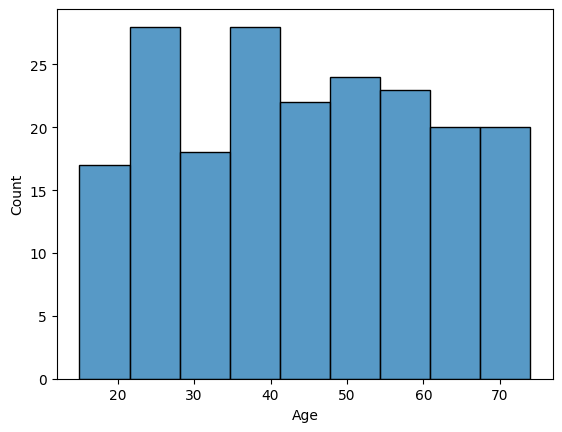

In [ ]:
sns.histplot(df['Age'])

## 2. Cleaning Data

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis (EDA)

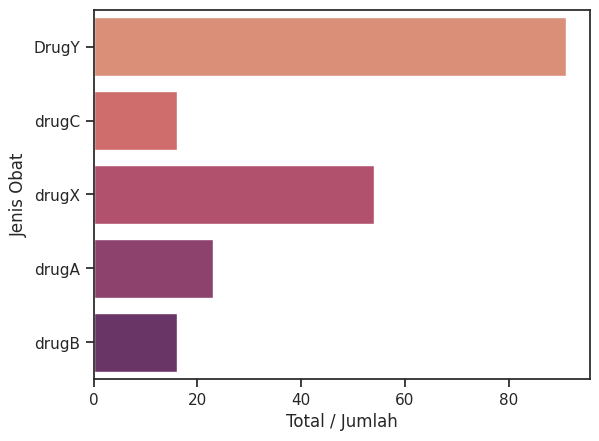

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(y='Drug', data=df, palette='flare')
plt.ylabel("Jenis Obat")
plt.xlabel('Total / Jumlah')
plt.show()

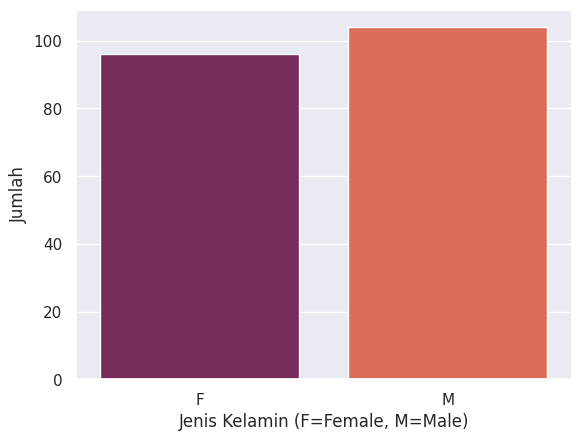

In [ ]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Sex', data=df, palette='rocket')
plt.ylabel("Jumlah")
plt.xlabel('Jenis Kelamin (F=Female, M=Male)')
plt.show()

## 3. Data Preparation

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
X = df.drop(columns = ['Drug'])
y = df['Drug']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (200, 5)
y :  (200,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (160, 5)
y_train : (160,)
x_test : (40, 5)
y_test : (40,)


## 4. Modeling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

Akurasi KNN : 77.50%


In [ ]:
testing = {'Age': [35],
        'Sex': [1],
        'BP': [2],
        'Cholesterol': [0],
        'Na_to_K': [4.5]}

testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,35,1,2,0,4.5


In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Pasien Baru")
print(pred_coba)

Hasil Prediksi dari Pasien Baru
[4]
